# Métodos III - Integrales


## Integrales en varias dimensiones


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Marzo 2019


In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Tue Mar 31 10:54:51 2020


Estructura del tema:

- Integral en 3D <a href="https://youtu.be/x4rNgrcBNEEIntegral"><img src="imgs/play.png" width="20" align="left"/></a>

    - Ejemplo de integral en un volumen dado.

- <a href="https://youtu.be/_zcybsGfcu8"><img src="imgs/play.png" width="20" align="left"/></a> Cambio de variables


### Objectivos

Extender la integral de una función escalar de dos dimensions.

Definición de regiones en varias dimensiones.

Extender cómo integrar con un cambio de variables.

Mostrar algunos ejemplos sencillos


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

### Integrales en varias dimensiones

#### Extensión de la integral.

Sea una función escalar, $f(x, y, z)$, y un prisma dado por: $[a, b] \times [c, d] \times [e, f]$. La integral de la función en el prisma es:

$$
\int_{V} f(x, y, z) \, \mathrm{d}x \mathrm{d}y \mathrm{d}z = \int_a^b \int_c^d \int_e^f f(x, y, z) \, \mathrm{d}x \mathrm{d}y \mathrm{d}z
$$



El **teorema de Fubini** nos asegura que podemos integrar en el orden que deseemos.

$$
\int_a^b \int_c^d \int_e^f f(x, y, z) \, \mathrm{d}x \mathrm{d}y \mathrm{d}z = 
\int_a^b \left[ \int_c^d \left[ \int_e^f f(x, y, z) \, \mathrm{d}z \right] \mathrm{d}y \right]  \mathrm{d}x 
$$
$$
= \int_e^f \left[ \int_c^d \left[ \int_a^b f(x, y, z) \, \mathrm{d}x \right] \mathrm{d}y \right]  \mathrm{d}z = \; ...
$$


#### Integrales en volumenes que no son un prisma.

Considera el siguiente volumen limitado por superficie $z = x^2 + y^2$ hasta $z = 2$, con $x \ge 0$ e $y \ge 0$.

La siguiente figura te muestra este volumen.


In [3]:
rrange, phirange = (0, np.sqrt(2), 20), (0, np.pi/2, 20)
xfun  = lambda r, phi : r * np.cos(phi)
yfun  = lambda r, phi : r * np.sin(phi)
zfun  = lambda r, phi : r * r
ztop  = lambda r, phi : 2 + 0.*r # this is trick
cero  = lambda r, phi : 0 + 0.*r

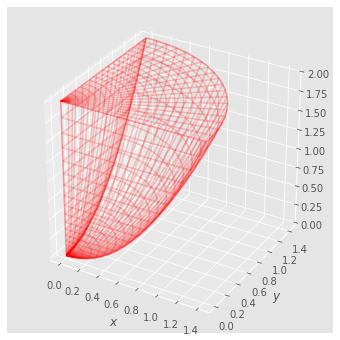

In [4]:
gf.wfsurface(xfun, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r');
gf.wfsurface(xfun, yfun, ztop, rrange, phirange, alpha = 0.2, color = 'r', newfig = False)
gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False)
gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False);

Vamos a definir el anterior volumen como tipo I.

En la figura se muestra la tapa superor, que nos permite determinar el rango de integración.
El intervalo en $x$ en $[0, \sqrt{2}]$. Mientras que fijado un valor de $x$, el intervalo de $y$ es $[0, \sqrt{2 - x^2}]$.

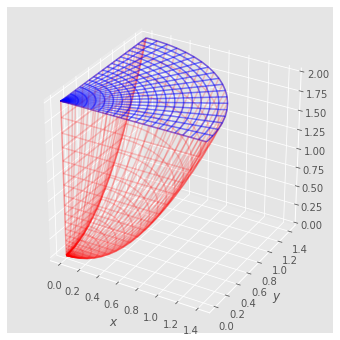

In [5]:
gf.wfsurface(xfun, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r');
gf.wfsurface(xfun, yfun, ztop, rrange, phirange, alpha = 0.5, color = 'b', newfig = False)
gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False)
gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False);

En la figura se muestra el segmento en $z$ de integracción fijado un punto $(x, y)$, que corresponde a $[x^2 + y^2, 2].$

In [6]:
x0 = 0.5 * np.sqrt(2.)
y0 = 0.5 *(np.sqrt(2 - x0*x0))
trange = (0., 1., 20)
xline = lambda t : x0 + 0. * t 
yline = lambda t : y0 + 0. * t
zline = lambda t : (1 - t) * (x0*x0 + y0*y0) + 2. * t

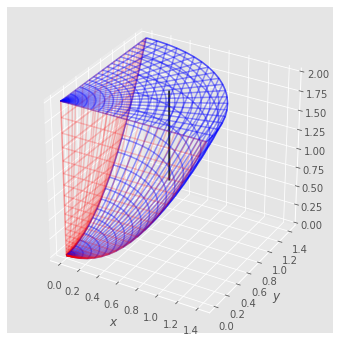

In [7]:
gf.wfsurface(xfun, yfun, zfun, rrange, phirange, alpha = 0.4, color = 'b');
gf.wfsurface(xfun, yfun, ztop, rrange, phirange, alpha = 0.4, color = 'b', newfig = False)
gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False)
gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False);
gf.line3d(xline, yline, zline, trange, alpha = 0.5, color = 'black', newfig = False);

El volumen queda definido como:

$$
\{ 0 \le x \le \sqrt{2}, \; 0 \le y \le \sqrt{2-x^2}, \; x^2 + y^2 \le z \le 2 \}
$$

Luego la integral queda:

$$
\int_0^{\sqrt{2}} \left[ \int_0^{\sqrt{2-x^2}} \left[ \int_{x^2+y^2}^2 f(x, y, z) \, \mathrm{d}z \right]\mathrm{d}y\right] \mathrm{d}x
$$

En 3 dimensiones podemos definir un volumen con 6 tipos distintos, de forma simular a cómo definimos las regiones en 2 dimensiones.

Por ejemplo, el volumen de tipo I sería:

$$
\{ a \le x \le b, \, \phi_0(x) \le y \le \phi_1(x), \, \gamma_0(x, y) \le z \le \gamma_1(x, y) \}
$$

donde el intervalo de integración en $x$ es $[a, b]$. Fijado un valor de $x$, los límites de integración en $y$ vienen dados por las funciones reales $[\phi_0(x), \phi_1(x)]$. Y finalmente, fijado un punto $(x, y)$, los límites de integración en $z$ están dados por las funciones escalares $[\gamma_0(x, y), \gamma_1(x, y)]$.

La integral es:
    
$$
\int_a^b \left[ \int_{\phi_0(x)}^{\phi_1(x)} \left[ \int_{\gamma_0(x, y)}^{\gamma_1(x,y)} f(x, y, z) \, \mathrm{d}z \right] \mathrm{d}y \right] \mathrm{d}x
$$

En el caso en que $f(x, y, z) = 1$, la integral corresponde al volumen.

*Ejercicio*: Integra la función $f(x, y, z) = x$ en el volumen anterior.

$$
\int_0^{\sqrt{2}} \left[ \int_0^{\sqrt{2-x^2}} \left[ \int_{x^2+y^2}^2 x \, \mathrm{d}z \right] \mathrm{d}y \right] \mathrm{d}x 
= \int_0^{\sqrt{2}} \left[ \int_0^{\sqrt{2-x^2}} x \, z \Big|_{x^2+y^2}^2 \mathrm{d}y\right] \mathrm{d}x 
$$
$$
= \int_0^{\sqrt{2}} \left[ \int_0^{\sqrt{2-x^2}} x \, (2-  x^2- y^2) \mathrm{d}y\right] \mathrm{d} x 
= \int_0^{\sqrt{2}} \left. x(2-x^2) y - x \frac{y^3}{3} \right|_0^{\sqrt{2-x^2}}  \mathrm{d}x 
$$
$$
= \int_0^{\sqrt{2}}  \frac{2x}{3}(2-x^2)^{3/2} \mathrm{d} x 
= \left. -\frac{2}{15} (2-x^2)^{5/2} \right|_0^{\sqrt{2}}
= \frac{8}{15} \sqrt{2}
$$





Vamos a redefinir el volumen de otro tipo.

El rango en $z$ es $[0, 2]$. 

La figura muestra el plano $(x, y)$ una vez fijado un valor de $z$. El rango, por ejemplo, de $y$ es $[0, \sqrt{z}]$.

La figura también muestra el segmento en $x$ una vez fijado un punto $(y, z)$. El rango en $x$ es $[0, \sqrt{z - y^2}]$.

In [8]:
z0 = 0.5 * 2.
y0 = 0.5 * np.sqrt(z0)
xval = lambda r, phi : r * np.sqrt(z0/2.) * np.cos(phi)
yval = lambda r, phi : r * np.sqrt(z0/2.) * np.sin(phi)
zval = lambda r, phi : z0 + 0.*r
xline = lambda t : np.sqrt(z0 - y0*y0) * t 
yline = lambda t : y0 + 0. * t
zline = lambda t : z0 + 0. * t

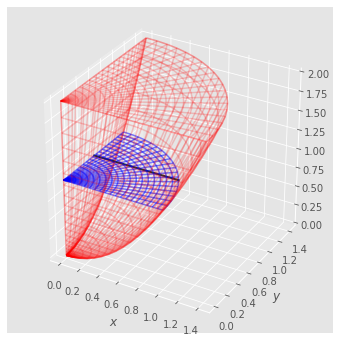

In [9]:
gf.wfsurface(xfun, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r');
gf.wfsurface(xfun, yfun, ztop, rrange, phirange, alpha = 0.2, color = 'r', newfig = False)
gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False)
gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False);
gf.wfsurface(xval, yval, zval, rrange, phirange, alpha = 0.5, color = 'b', newfig = False)
gf.line3d(xline, yline, zline, trange, alpha = 0.5, color = 'black', newfig = False);

El volumen se puede redefinir como:
    
$$
\{0 \le z \le 2, \; 0 \le y \le \sqrt{z}, \, 0 \le x \le \sqrt{z-y^2} \}
$$

La integral queda:

$$
\int_0^2 \left[ \int_0^{\sqrt{z}} \left[ \int_0^{\sqrt{z-y^2}} f(x, y, z) \, \mathrm{d}x \right]\mathrm{d}y\right] \mathrm{d}z
$$


*Ejercicio*: Repite la integral de $f(x, y, z) = x$ con la nueva definición del volumen.

$$
\int_0^2 \left[ \int_0^{\sqrt{z}} \left[ \int_0^{\sqrt{z-y^2}} x \, \mathrm{d}x \right]\mathrm{d}y\right] \mathrm{d}z
= \int_0^2 \left[ \int_0^{\sqrt{z}} \left. \frac{x^2}{2} \right|_0^{\sqrt{z-y^2}} \mathrm{d}y\right] \mathrm{d}z
$$
$$
= \int_0^2 \left[ \int_0^{\sqrt{z}} \frac{z-y^2}{2} \mathrm{d}y \right] \mathrm{d}z
= \int_0^2 \left. \frac{z}{2}y -\frac{y^3}{6} \right|_0^{\sqrt{z}} \mathrm{d}z
$$
$$
= \int_0^2 \frac{1}{3} z^{3/2}\mathrm{d}z
= \left. \frac{2}{15} z^{5/2} \right|_0^2 = \frac{8}{15} \sqrt{2}
$$

## Cambio de variables

En el caso anterior, la integral se resuelve de forma más cómoda en cilíndricas.

Al igual que vimos en funciones escalares de dos dimensiones. En unas nuevas variables $(u, v, w)$, con $x(u, v, w), y (u, v, w), z(u, v, w)$, viene dada por:

$$
\int_{V} f(x, y, z) \, \mathrm{d}x \mathrm{d}y \mathrm{d}z 
= \int_{V'} f(u, v, w) \, |J| \mathrm{d}u \mathrm{d}v \mathrm{d}w 
$$

donde $V'$ es el volumen y $f(u, v, w)$ la función en las nuevas variables.


Mientras que el elemento diferencial de volumen
$$
\mathrm{d}x \mathrm{d}y \mathrm{d}z \to |J| \mathrm{d}u \mathrm{d}v \mathrm{d}w 
$$

Donde $|J|$ es el valor absoluto del jacobiano, el determinante de la matriz jacobiana del cambio de variables:

$$
J = 
\left| \begin{array}{ccc} 
\frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} & \frac{\partial x}{\partial w} \\
\frac{\partial y}{\partial u} & \frac{\partial y}{\partial v} & \frac{\partial y}{\partial w} \\
\frac{\partial z}{\partial u} & \frac{\partial z}{\partial v} & \frac{\partial z}{\partial w} 
\end{array}\right|
$$

**Cambio a cilíndricas**

Recordemos que el cambio a cilíndricas es:

$$
x(r, \phi, z) = r \cos \phi, \; y(r, \phi, z) = r \sin \phi, \; z(r, \phi, z) = z
$$

La matriz Jacobiana:

$$
\left(\begin{array}{ccc} 
\cos \phi  & -r \sin \phi & 0 \\
\sin \phi  & r \cos \phi  & 0 \\
0 & 0 & 1 \\
\end{array} \right)
$$

Y el Jacobiano, $J = r$

Luego:
$$
\mathrm{d}x \mathrm{d}y \mathrm{d}z \to r \, \mathrm{d}r \mathrm{d}\phi \mathrm{d}z
$$


*Ejercicio*: Calcula nuevamente la integral de $f(x, y, z) = x$ en el volumen anterior en coordenadas cilíndricas.

El volumen podemos definirlo como en cilíndricas como:

$$
\{0 \le z \le 2,\; 0 \le \phi \le \pi/2, \, 0 \le r \le \sqrt{z} \}
$$

La integral, como $x = r \cos \phi$, queda:

$$
\int_0^2 \left[ \int_0^{\pi/2} \left[ \int_0^{\sqrt{z}} r \cos \phi \, r \mathrm{d}r \right]\mathrm{d}\phi\right] \mathrm{d}z
$$


$$
\int_0^2  \sin \phi \Big|_0^{\pi/2} \left. \frac{r^3}{3} \right|_0^{\sqrt{z}}  \mathrm{d}z
= \int_0^2 \frac{z^{3/2}}{3} \mathrm{d}z 
= \left. \frac{2}{15} z^{5/2} \right|_0^2 = \frac{8}{15} \sqrt 2
$$

**Cámbio a esféricas**

Recordemos el cámbio de coordenadas esféricas:

$$
x(r, \phi, \theta) =  r \cos \phi \sin \theta, \; y(r, \phi, \theta) = r \sin \phi \sin \theta, \;  z(r, \phi, \theta) = r \cos \theta 
$$

Y su matriz jacobiana:
$$
\left( \begin{array}{ccc} 
\cos \phi \sin \theta & - r \sin \phi \sin \theta &  r \cos \phi \cos \theta \\
\sin \phi \sin \theta &   r \cos \phi \sin \theta &  r \sin \phi \cos \theta \\
          \cos \theta &                         0 & -r \sin \theta  
\end{array} \right)
$$

Y el valor absoluto del jacobiano $|J| = r^2 \sin\theta$

Por lo tanto:
$$
\mathrm{d}x\mathrm{d}y\mathrm{d}z \to r^2 \sin\theta \, \mathrm{d}r\mathrm{d}\phi\mathrm{d}\theta
$$


El jacobiano:
$$
J = \cos \theta \left( -r^2 \sin^2 \phi \sin \theta \cos \theta - r^2 \cos^2 \phi \cos \theta \sin \theta \right) - r \sin \theta \left( r \cos^2 \phi \sin^2 \theta + r \sin^2 \phi \sin^2 \theta \right)
$$
$$
= -r^2 \sin \theta \cos^2 \theta - r^2 \sin^3 \theta = -r \sin \theta 
$$

La siguiente figura muestra el elemento diferencial de volumen en coordenadas esféricas.

<img src="imgs/dv_esfericas.png" width="350"/>

Los lados del elemento diferencial son, $\mathrm{d}r$, $r\mathrm{d}\theta$, y $r \sin \theta \mathrm{d}\phi$.

*Ejercicio*: Calcula la integral de $f(x, y, z) = e ^{(x^2 + y^2 + z^2)^{3/2}}$ en la esfera de radio unidad.

La definición de la esfera de radio unidad:
$$
\{ 0 \le r \le 1, \, 0 \le \phi \lt 2 \pi, \, 0 \le \theta \le \pi \}
$$

La integral queda:
$$
\int_0^1 \int_0^{2\pi} \int_0^\pi e^{r^3} \, r^2 \sin \theta \mathrm{d}r \mathrm{d}\theta \mathrm{d} \phi = \phi \big|_0^{2\pi} (-\cos \theta) \big|_0^\pi \frac{1}{3} e^{r^3} \big|_0^1 = \frac{4 \pi}{3} (e-1)
$$